Utilizaremos el dataset Iris para entrenar un clasificador multi clase con PyTorch

In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
features, pre_labels = iris_data.data, iris_data.target
print (features[::10]) #print every 10th element
print (pre_labels[::10]) #print every 10th element

[[5.1 3.5 1.4 0.2]
 [5.4 3.7 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [4.8 3.1 1.6 0.2]
 [5.  3.5 1.3 0.3]
 [7.  3.2 4.7 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.2 4.8 1.8]
 [5.5 2.4 3.8 1.1]
 [5.5 2.6 4.4 1.2]
 [6.3 3.3 6.  2.5]
 [6.5 3.2 5.1 2. ]
 [6.9 3.2 5.7 2.3]
 [7.4 2.8 6.1 1.9]
 [6.7 3.1 5.6 2.4]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Vamos a utilizar **One-Hot-Encoding** para definir las etiquetas.

In [2]:
labels = []
for num in range(len(pre_labels)):
    if pre_labels[num] == 0:
        labels.append([1, 0, 0])
    if pre_labels[num] == 1:
        labels.append([0, 1, 0])
    if pre_labels[num] == 2:
        labels.append([0, 0, 1])
        
import numpy as np
labels = np.array(labels, dtype = int)

Hacemos el split de los conjuntos de training y test.

In [3]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, labels_train, labels_test = train_test_split(features, labels, random_state = 42)
print (len(feature_train))
print (len(feature_test))

112
38


Importamos PyTorch y almacenamos nuestros split del dataset en Tensores (Tipo de variables que procesa PyTorch)

In [4]:
import torch
import torch.nn as nn #PyTorch's module wrapper
import torch.optim as optim #PyTorch's optimiser
import torch.nn.functional as F
from torch.autograd import Variable #PyTorch's implementer of gradient descent and back propogation
import matplotlib.pyplot as plt #importing graph plotting functionality
%matplotlib inline

feature_train_v = Variable(torch.FloatTensor(feature_train), requires_grad = False)
labels_train_v = Variable(torch.FloatTensor(labels_train), requires_grad = False)
feature_test_v = Variable(torch.FloatTensor(feature_test), requires_grad = False)
labels_test_v = Variable(torch.FloatTensor(labels_test), requires_grad = False)

print (feature_train_v[0])
print (labels_train_v[0])

tensor([5.0000, 3.6000, 1.4000, 0.2000])
tensor([1., 0., 0.])


El modelo consiste en una capa con activación lineal y una capa de salida softmax.

In [7]:
class LinearClassifier(nn.Module):
    
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.h_layer = nn.Linear(4, 3)
        self.s_layer = nn.Softmax()
        
    def forward(self,x):
        y = self.h_layer(x)
        p = self.s_layer(y)
        return p
    
model = LinearClassifier() #declaring the classifier to an object
loss_fn = nn.BCELoss() #calculates the loss
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

Entrenamos el modelo

In [8]:
all_losses = []
for num in range(5000): #5000 iterations
    pred = model(feature_train_v) #predict
    loss = loss_fn(pred, labels_train_v) #calculate loss
    all_losses.append(loss.data)
    optim.zero_grad() #zero gradients to not accumulate
    loss.backward() #update weights based on loss
    optim.step() #update optimiser for next iteration

/home/ezequiel/.conda/envs/matsup/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Visualizamos la perdida durante el entrenamiento

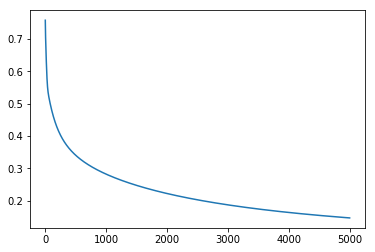

tensor([0.0396, 0.6961, 0.2643], grad_fn=<SelectBackward>)
tensor([0., 1., 0.])
0.14622801542282104


In [9]:
all_losses = np.array(all_losses, dtype = np.float)
plt.plot(all_losses)
plt.show()

print(pred[3])
print(labels_train_v[3])
print(all_losses[-1])

In [10]:
from sklearn.metrics import accuracy_score

predicted_values = []
for num in range(len(feature_test_v)):
    predicted_values.append(model(feature_test_v[num]))

/home/ezequiel/.conda/envs/matsup/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


In [11]:
score = 0
for num in range(len(predicted_values)):
    if np.argmax(labels_test[num]) == np.argmax(predicted_values[num].data.numpy()):
        score = score + 1
        
accuracy = float(score / len(predicted_values)) * 100
print ('Testing Accuracy Score is ' + str(accuracy))

Testing Accuracy Score is 100.0
